In [1]:
#hello hisham
from sage.graphs.graph import Graph

# Creating a graph with vertices and edges
G = Graph()
G.add_vertices([1, 2, 3, 4])
G.add_edges([(1, 2, -1), (2, 3, 1), (3, 4, 1), (4, 1, -1), (1, 3, 1)])
L = G.laplacian_matrix()
L_star = L.delete_rows([0]).delete_columns([0])


print(L)
print(L_star)

det = L_star.det()
print(det)


[ 3 -1 -1 -1]
[-1  2 -1  0]
[-1 -1  3 -1]
[-1  0 -1  2]
[ 2 -1  0]
[-1  3 -1]
[ 0 -1  2]
8


In [223]:
def laplacian(G, i, j):
    L = G.laplacian_matrix()
    L_star = L.delete_rows([i]).delete_columns([j])
    det = L_star.det()
    return L, L_star, det

In [16]:
G = Graph()
G.add_vertices([1, 2, 3, 4])
G.add_edges([(1, 2, -1), (2, 3, 1), (3, 4, 1), (4, 1, -1), (1, 3, 1)])

for i in range(0, 3):
    for j in range(0, 3):
        results = laplacian(G, i, j)
        print(f"i = {i+1}, j = {j+1}, det: {results[2]}")

i = 1, j = 1, det: 8
i = 1, j = 2, det: -8
i = 1, j = 3, det: 8
i = 2, j = 1, det: -8
i = 2, j = 2, det: 8
i = 2, j = 3, det: -8
i = 3, j = 1, det: 8
i = 3, j = 2, det: -8
i = 3, j = 3, det: 8


In [6]:

K_51 = Knots().from_table(5, 1)
K_52 = Knots().from_table(5, 2)
K_61 = Knots().from_table(6, 1)
K_62 = Knots().from_table(6, 2)
K_63 = Knots().from_table(6, 3)
K_71 = Knots().from_table(7, 1)
K_72 = Knots().from_table(7, 2)
K_73 = Knots().from_table(7, 3)
K_74 = Knots().from_table(7, 4)
K_75 = Knots().from_table(7, 5)
K_76 = Knots().from_table(7, 6)
K_77 = Knots().from_table(7, 7)

K_51a = K_51.alexander_polynomial()
print(K_51a)




t^-2 - t^-1 + 1 - t + t^2


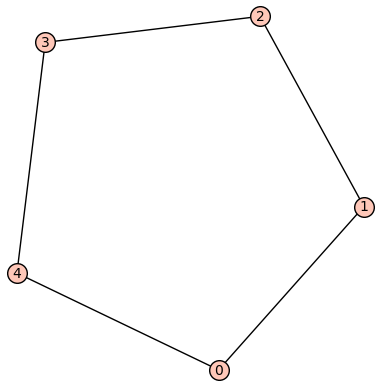

TypeError: 'tuple' object is not callable

In [323]:
G_51 = Graph()
G_51.add_vertices([0, 1, 2, 3, 4])
G_51.add_edges([(0, 1, 1), (1, 2, 1), (2, 3, 1), (3, 4, 1), (0, 4, 1)])

plot = G_51.plot()

plot.show()

laplacian(G_51, 0, 0)

In [65]:
L = Link('3_1')
K = L.sage_link()
gc = K.gauss_code()
pd_code = L.PD_code()
dn = K.dowker_notation()


In [31]:
L = Link('4_1')
K = L.sage_link()
gc = K.gauss_code()
gc

[[2, -3, 4, -2, 1, -4, 3, -1]]

In [79]:
L = Link('3_1')
K = L.sage_link()
gc = K.gauss_code()
pd = L.PD_code()
pd

[(5, 2, 0, 3), (3, 0, 4, 1), (1, 4, 2, 5)]

In [85]:
L = Link('3_1')
K = L.sage_link()
dn = K.dowker_notation()
regions = K.regions()
print(f'Dowker Notation: {dn}, regions: {regions}')

Dowker Notation: [(6, 3), (4, 1), (2, 5)], regions: [[6, 4, 2], [5, -2], [3, -6], [1, -4], [-1, -3, -5]]


In [84]:
def list_filter(l):
    filtered_list = [sublist for sublist in l if len(sublist) == 2]
    return filtered_list

list_filter(regions)

[[5, -2], [3, -6], [1, -4]]

In [7]:
import networkx as nx
def graph_of_link(L):
    dig = L.digraph()
    G = nx.DiGraph()
    for v in dig.vertices:
        G.add_node(v)
    for e in dig.edges:
        G.add_edge(e[0], e[1])
    G_und = G.to_undirected()
    return G_und
    

In [10]:
import snappy
L_51 = snappy.Link('6_2')
L_51M = L_51.mirror()

graph_of_link(L_51)


AttributeError: 'Graph' object has no attribute 'show'

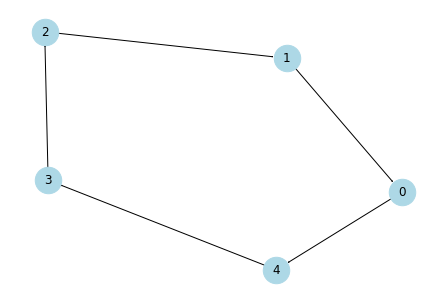

In [118]:
graph_of_link(L_51M)

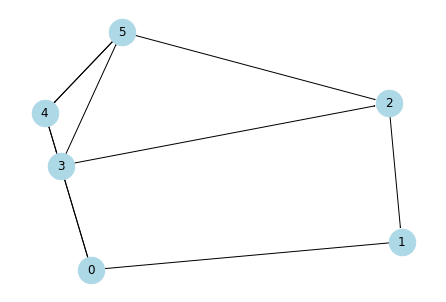

In [11]:
import networkx as nx
import snappy
L = snappy.Link('6_2')
dig = L.digraph()
G = nx.DiGraph()
for v in dig.vertices:
    G.add_node(v)
for e in dig.edges:
    G.add_edge(e[0], e[1])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrowsize=1)

In [130]:
L = Link([(3,7,4,6),(7,3,8,2),(1,4,2,5),(5,8,6,1)])
seifert_matrix = L.seifert_matrix()
seifert_matrix

[-1  0]
[-1  1]

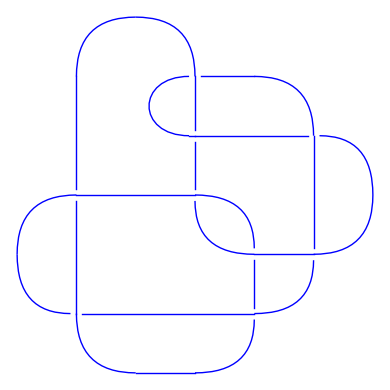

[ 1  0  0  0  0  1  0  0]
[ 0 -1  0  0  0  0  0  0]
[ 0  1 -1  0  0  0  0  0]
[ 0  0  1 -1  1  0  0  0]
[ 0  0  0  0  0  0  0  0]
[ 0  0  0  1  0 -1  0  0]
[ 0  0  0  0 -1  1  0 -1]
[ 0  0  0  0  0  0  0  1]

In [329]:
L = Link([(18,6,1,5),(6,2,7,1),(9,2,10,3),(3,10,4,11),(8,14,9,13),(14,8,15,7),(16,11,17,12),(12,15,13,16),(4,18,5,17)])
K = L.sage_link()
plot = K.plot()
plot.show()
seifert_matrix = K.seifert_matrix()
seifert_matrix
#sm_t = seifert_matrix.transpose()
#added = sm_t + seifert_matrix
#added
#added.det()

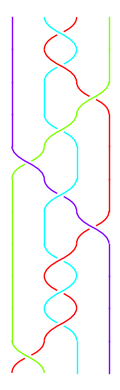

In [333]:
B = K.braid()
plot = B.plot()
plot.show()

In [157]:
trefoil_w_R2 = Link([(5,1,6,10),(6,1,7,2),(7,3,8,2),(3,9,4,8),(9,5,10,4)])
K = trefoil_w_R2.sage_link()
seifert_matrix = K.seifert_matrix()
seifert_matrix_transpose = seifert_matrix.transpose()
added = seifert_matrix + seifert_matrix_transpose
added.det()

3

In [324]:
def reduced_laplacian(L, i, j):
    mtx = matrix(L)
    L_star = mtx.delete_rows([i]).delete_columns([j])
    det = L_star.det()
    return L_star, det

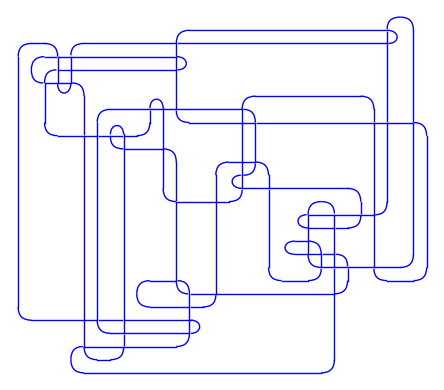

(60 x 60 dense matrix over Integer Ring, 8933398004395593707955296)

In [370]:
import snappy
import networkx as nx

L = snappy.random_link(100)
K = L.sage_link()
G = graph_of_link(L)
plot = K.plot()
plot.show()
lap = nx.laplacian_matrix(G).toarray()
lap
laplacian = reduced_laplacian(lap, 0, 0)
laplacian

In [4]:
import snappy
import networkx as nx


def laplacian_of_link(L, i, j): #returns the reduced laplacian and determinant for a link.
    K = L.sage_link()
    G = graph_of_link(L)
    ###In order to identify the link, there is a reduce function or something in snappy, or some other invariant?
    plot = K.plot()
    plot.show()
    lap = nx.laplacian_matrix(G).toarray()
    laplacian = reduced_laplacian(lap, i, j)
    return laplacian

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [3]:
i = 0
while i < 10:
    L = snappy.random_link(100)
    if len(L) == 0:
        print("Unknot")
        continue
    print(laplacian_of_link(L, 0, 0))
    i+=1

NameError: name 'snappy' is not defined

In [3]:
import snappy
L = snappy.Link('3_1')
plot = L.plot()
plot.show()

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [382]:
L = Link('6_2')
seifert = L.seifert_matrix()
added = seifert + seifert.transpose()
added.det()
#laplacian_of_link(L, 5, 5)

-11

In [351]:
L = Link('9_42')
seifert = L.seifert_matrix()
seifert_transpose = seifert.transpose()
added = seifert + seifert_transpose
added.det()
print(f"seifert = {seifert}, transpose = {seifert.transpose()}, sum = {added}, determinant = {added.det()}")

seifert = [ 0  0  0  0  0  0  0  0]
[ 0  1 -1  0  0  0  0  0]
[ 0  0  1 -1  0  0  0  0]
[ 0  0  0  0  0  0  0  0]
[ 0  0  0  1 -1  0  0  0]
[-1  0  0  0  1  0 -1  0]
[ 0  0  0  0  0  0  1  0]
[ 0  0  0 -1  0  0  1 -1], transpose = [ 0  0  0  0  0 -1  0  0]
[ 0  1  0  0  0  0  0  0]
[ 0 -1  1  0  0  0  0  0]
[ 0  0 -1  0  1  0  0 -1]
[ 0  0  0  0 -1  1  0  0]
[ 0  0  0  0  0  0  0  0]
[ 0  0  0  0  0 -1  1  1]
[ 0  0  0  0  0  0  0 -1], sum = [ 0  0  0  0  0 -1  0  0]
[ 0  2 -1  0  0  0  0  0]
[ 0 -1  2 -1  0  0  0  0]
[ 0  0 -1  0  1  0  0 -1]
[ 0  0  0  1 -2  1  0  0]
[-1  0  0  0  1  0 -1  0]
[ 0  0  0  0  0 -1  2  1]
[ 0  0  0 -1  0  0  1 -2], determinant = -7


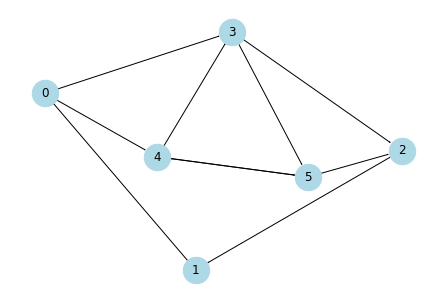

In [374]:
L = Link('6_2')
dig = L.digraph()
G = nx.DiGraph()
for v in dig.vertices:
    G.add_node(v)
for e in dig.edges:
    G.add_edge(e[0], e[1])
nx.draw(G, with_labels=True, node_size=700, node_color='lightblue', arrowsize=1)

In [408]:
import snappy

L = Link('6_2')
L.dual_graph()

ValueError: invalid input: data must be either a list or a braid

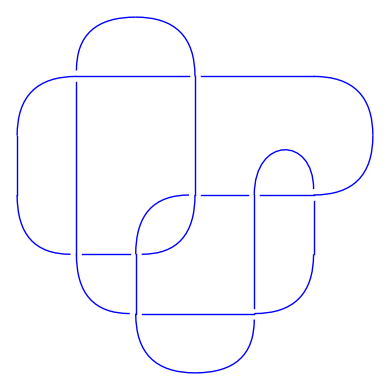

In [3]:
import snappy
L = snappy.Link('9_42')
K = L.sage_link()
G = L.digraph()
Lplot = K.plot()
Lplot.show()



In [7]:
import snappy
import networkx as nx
import matplotlib.pyplot as plt

link = snappy.Link('6_2')



def tait_graph_of_link(L):
    crossings = L.crossings  # Get the crossings of the link
    tait_graph = {}  # Dictionary to hold adjacency information for Tait graph
    
    # Process each crossing to create edges in the Tait graph
    for crossing in crossings:
        over_strands, under_strands = crossing
        
        # Iterate over each pair of over and under strands
        for over, under in zip(over_strands, under_strands):
            region1 = f"R{abs(over)}"
            region2 = f"R{abs(under)}"
            
            # Add edges to the Tait graph
            if region1 not in tait_graph:
                tait_graph[region1] = []
            if region2 not in tait_graph:
                tait_graph[region2] = []
            
            tait_graph[region1].append(region2)
            tait_graph[region2].append(region1)
    
    return tait_graph


tait_graph_of_link(link)

ValueError: too many values to unpack (expected 2)

In [10]:
L = snappy.Link('3_1')
L.crossings
L.faces()

[[<CS 2, 3>, <CS 1, 3>, <CS 0, 3>],
 [<CS 2, 2>, <CS 0, 0>],
 [<CS 2, 1>, <CS 0, 1>, <CS 1, 1>],
 [<CS 2, 0>, <CS 1, 2>],
 [<CS 1, 0>, <CS 0, 2>]]

In [16]:
import snappy

L = snappy.Link('6_2')

lenL.faces()

[[<CS 5, 3>, <CS 2, 1>, <CS 3, 3>],
 [<CS 5, 2>, <CS 3, 0>, <CS 4, 0>],
 [<CS 5, 1>, <CS 4, 1>],
 [<CS 5, 0>, <CS 4, 2>, <CS 0, 0>, <CS 1, 0>, <CS 2, 0>],
 [<CS 4, 3>, <CS 3, 1>, <CS 0, 3>],
 [<CS 3, 2>, <CS 2, 2>, <CS 1, 2>, <CS 0, 2>],
 [<CS 2, 3>, <CS 1, 1>],
 [<CS 1, 3>, <CS 0, 1>]]

In [2]:
import snappy
K_62 = snappy.Link('6_2')
polyhedra = K_62.tetrahedra()

for poly in polyhedra:
    faces = poly.faces()
    for face in faces:
        print(face)

AttributeError: 'Manifold' object has no attribute 'tetrahedra'